## 2.0 Car Price Prediction project using Regression

### 2.1 Importing Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

### 2.2 Data Preparation

In [285]:
df = pd.read_csv('data.csv')
df.head()
df.columns = df.columns.str.lower().str.replace(' ','_')
str_cols = list(df.dtypes[df.dtypes == object].index)
for col in str_cols:
    df[col] = df[col].str.lower()

### 2.3 Data Exploration and Analysis

In [286]:
for col in df.columns:
    print(f'**** {col} ****')
    print(df[col].describe())
    print('unique')
    print(df[col].unique()[:5])
    print(f'count of null: {df[col].isnull().sum()}')
    print("\n")

**** make ****
count         11914
unique           48
top       chevrolet
freq           1123
Name: make, dtype: object
unique
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
count of null: 0


**** model ****
count              11914
unique               914
top       silverado 1500
freq                 156
Name: model, dtype: object
unique
['1 series m' '1 series' '100' '124 spider' '190-class']
count of null: 0


**** year ****
count    11914.000000
mean      2010.384338
std          7.579740
min       1990.000000
25%       2007.000000
50%       2015.000000
75%       2016.000000
max       2017.000000
Name: year, dtype: float64
unique
[2011 2012 2013 1992 1993]
count of null: 0


**** engine_fuel_type ****
count                11911
unique                  11
top       regular unleaded
freq                  7172
Name: engine_fuel_type, dtype: object
unique
['premium unleaded (required)' 'premium unleaded (requiredb zza  )'
 'regular unleaded' 'premium unleaded (recommended)'
 'flex

<Axes: xlabel='msrp', ylabel='Count'>

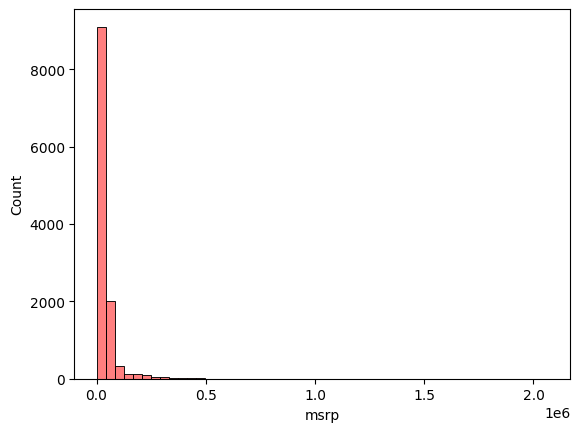

In [287]:
%matplotlib inline
sbn.histplot(df.msrp, bins=50, label= 'tail', color='red', alpha=0.5)


<Axes: xlabel='msrp', ylabel='Count'>

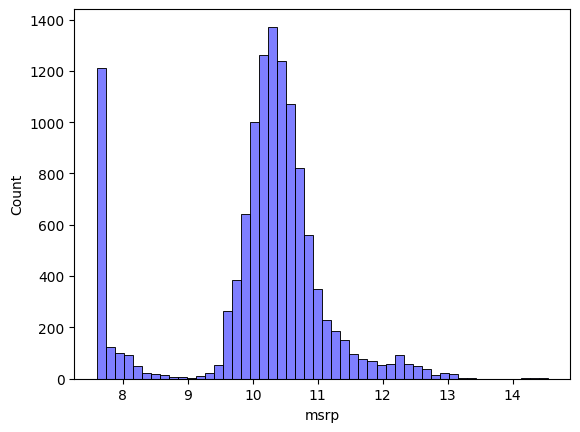

In [288]:
normal_msrp = np.log1p(df.msrp)
sbn.histplot(normal_msrp, bins=50, label = 'normal', color='blue', alpha=0.5)

### 2.4 Handling Null values

In [289]:
for col in df.columns:
    df[col] = df[col].fillna(0)

### 2.5 Setting up the validation framework

In [290]:
df_shuffle = df.copy()
tot_len = df_shuffle.shape[0]
indexes = np.arange(tot_len)
np.random.seed(2)
np.random.shuffle(indexes)
df_shuffle.index = indexes
df_shuffle = df_shuffle.sort_index()
df_shuffle

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,pontiac,le mans,1991,regular unleaded,74.0,4.0,manual,front wheel drive,2.0,0,compact,coupe,34,25,210,2000
1,hyundai,tucson,2017,regular unleaded,175.0,4.0,automated_manual,front wheel drive,4.0,crossover,compact,4dr suv,32,26,1439,24150
2,toyota,camry solara,2006,regular unleaded,157.0,4.0,automatic,front wheel drive,2.0,0,midsize,coupe,30,20,2031,20360
3,toyota,corolla,2015,regular unleaded,140.0,4.0,automatic,front wheel drive,4.0,0,compact,sedan,40,30,2031,19665
4,chevrolet,astro,2005,regular unleaded,190.0,6.0,automatic,rear wheel drive,3.0,0,large,passenger minivan,20,14,1385,24430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,dodge,stealth,1994,regular unleaded,320.0,6.0,manual,all wheel drive,2.0,"factory tuner,performance",compact,coupe,22,16,1851,2823
11910,porsche,panamera,2015,premium unleaded (required),570.0,8.0,automated_manual,all wheel drive,4.0,"luxury,high-performance",large,sedan,24,15,1715,180300
11911,lincoln,mark lt,2008,regular unleaded,300.0,8.0,automatic,rear wheel drive,4.0,luxury,large,crew cab pickup,16,12,61,38915
11912,lexus,gs 350,2015,premium unleaded (required),306.0,6.0,automatic,rear wheel drive,4.0,"luxury,performance",midsize,sedan,29,19,454,48600


In [291]:
val_len = test_len = int(0.2 * tot_len)
train_len = tot_len - val_len - test_len
y = np.log1p(df_shuffle.msrp)
X = df_shuffle.drop('msrp', axis=1)
df_train = X[:train_len]
target_train = y[:train_len]
df_val = X[train_len:train_len + val_len]
target_val = y[train_len:train_len + val_len]
df_test = X[train_len + val_len:]
target_test = y[train_len + val_len:]
df_train = df_train.reset_index(drop=True)
target_train = target_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
target_val = target_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
target_test = target_test.reset_index(drop=True)

### 2.6 Linear regression

In [292]:
def linear_regression(X,w):
    return X.dot(w)

### 2.7 Training a linear regression model

In [293]:
def train_model(X,y):
    count = X.shape[0]
    ones = np.ones(count)
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

### 2.8 Prepare features

In [294]:
def prepare(df):
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    df = df[base]
    X = df.values
    return X

### 2.9 Root mean square error

In [295]:
def rmse(y_predict, y):
    diff = y-y_predict
    mean = np.mean(diff ** 2)
    return np.sqrt(mean)

### 2.10 Validating the Model

In [296]:
X_train = prepare(df_train)
w0, w = train_model(X_train, target_train)
X_val = prepare(df_val)
val_predict = w0 + linear_regression(X_val, w)
rmse(val_predict, target_val)

np.float64(0.7635398568521404)

### 2.11 Simple feature engineering

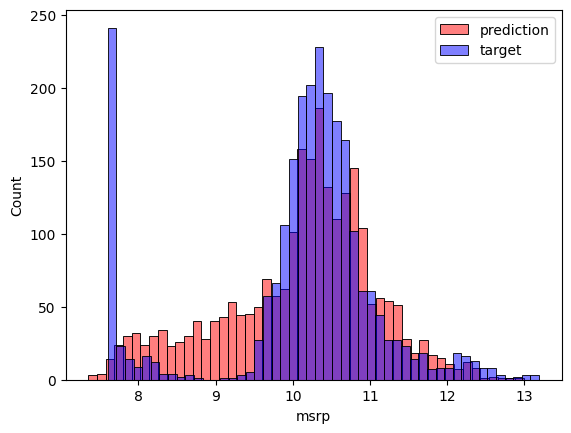

In [297]:
def prepare(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    df['age'] = 2017 - df['year']
    base = base + ['age']
    df = df[base]
    X = df.values
    return X

X_train = prepare(df_train)
w0, w = train_model(X_train, target_train)
X_val = prepare(df_val)
val_predict = w0 + linear_regression(X_val, w)
rmse(val_predict, target_val)

sbn.histplot(val_predict, label='prediction', color='red', alpha=0.5, bins=50)
sbn.histplot(target_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

### 2.12 Categorical variables

In [298]:
def prepare(df):
    df = df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style', 'number_of_doors']
    categorical = {}

    for c in categorical_columns:
        categorical[c] = list(df_train[c].value_counts().head().index)
    df['age'] = 2017 - df['year']
    base = base + ['age']

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            base.append('%s_%s' % (name, value))
    df = df[base]
    X = df.values
    return X

X_train = prepare(df_train)
w0, w = train_model(X_train, target_train)
X_val = prepare(df_val)
val_predict = w0 + linear_regression(X_val, w)
rmse(val_predict, target_val)

np.float64(36.57440330202377)

### 2.12 Regularization

In [299]:
def train_model(X,y, r=0.001):
    count = X.shape[0]
    ones = np.ones(count)
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    # regularize XTX
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    return w[0], w[1:]

X_train = prepare(df_train)
w0, w = train_model(X_train, target_train)
X_val = prepare(df_val)
val_predict = w0 + linear_regression(X_val, w)
rmse(val_predict, target_val)

np.float64(0.4685209736992601)

### 2.13 Tunning the model

In [300]:
for r in [0.0, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare(df_train)
    w0, w = train_model(X_train, target_train, r)
    X_val = prepare(df_val)
    val_predict = w0 + linear_regression(X_val, w)
    score = rmse(val_predict, target_val)
    print(r, w0, score)

r = 0.0000001
X_train = prepare(df_train)
w0, w = train_model(X_train, target_train, r)
X_val = prepare(df_val)
val_predict = w0 + linear_regression(X_val, w)
score = rmse(val_predict, target_val)
score

0.0 -2737442259476904.5 36.57440330202377
1e-07 -48435.58903714385 0.4685180040289885
1e-06 389.2923983320966 0.4685204913322146
1e-05 3.3808326072605643 0.4685205177314314
0.0001 5.706033354046056 0.46852060647085736
0.001 5.681352430981108 0.4685209736992601
0.1 5.659765382832083 0.4685650980707033
1 5.485358345881904 0.46922931642178994
10 4.627224420461627 0.48080922256578473


np.float64(0.4685180040289885)

### 2.14 Using the model

In [301]:
full_train = pd.concat([df_train, df_val])
full_target = np.concatenate([target_train, target_val])
X_full_train = prepare(full_train)
X_test = prepare(df_test)
w0, w =train_model(X_full_train,full_target, r = 0.0000001)
test_predict = w0 + linear_regression(X_test, w)
score = rmse(test_predict, target_test)

car = df_test.iloc[5].to_dict()
car_df = pd.DataFrame([car])
car_df
X_car = prepare(car_df)
predicted_car_price =  w0 + linear_regression(X_car, w)
predicted_car_price = predicted_car_price[0]
predicted_car_price = np.expm1(predicted_car_price)
real_price = np.expm1(target_test[5])
predicted_car_price, real_price

(np.float64(12363.135512346938), np.float64(14099.999999999996))